In [1]:
import pandas as pd
import treefiles as tf
import seaborn as sns

from anat_db.anat_real import get_pa_fe

pa, fe = get_pa_fe()

In [2]:
import importlib
import anat_db.anat_real as aze
importlib.reload(aze)
from anat_db.anat_real import Manager, lambda_x, boxplot

In [3]:
# for scaler in Manager.SCALERS.keys():
# 	print(f"{scaler:-^30}")
# 	g = Manager(pa, fe, scaler)
# 	g.print_results_ml()

<AxesSubplot:>

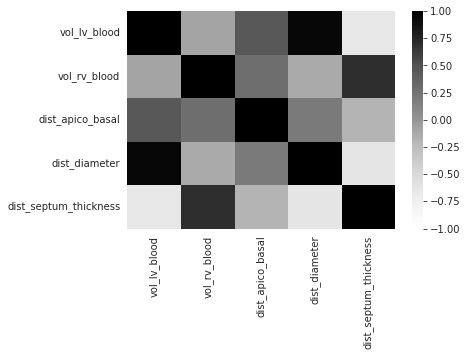

In [4]:
cor = fe.corr()
sns.heatmap(cor, vmin=-1, cmap='Greys')

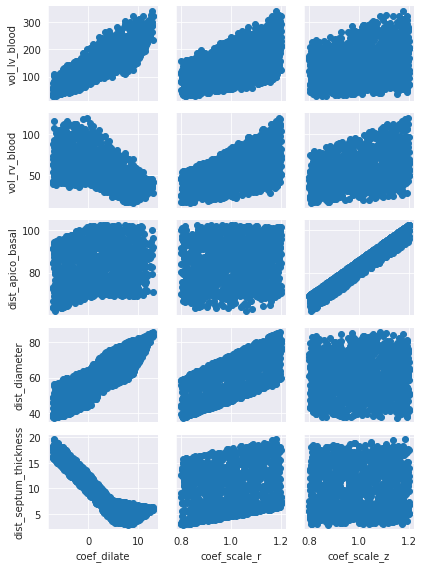

In [5]:
g = Manager(pa, fe, Manager.NOSCALER)
g.plot_values()

                 vol_lv_blood     vol_rv_blood     dist_apico_basal       dist_diameter   dist_septum_thickness 
 ------------   -------------   --------------   ------------------   -----------------   --------------------- 
  coef_dilate   0.77871 (0.0)   -0.68598 (0.0)         0.1934 (0.0)       0.75783 (0.0)           -0.9633 (0.0) 
 coef_scale_r   0.40473 (0.0)    0.64536 (0.0)   -0.01329 (0.64301)       0.49972 (0.0)             0.335 (0.0) 
 coef_scale_z   0.24191 (0.0)    0.31877 (0.0)        0.97041 (0.0)   0.00253 (0.92966)      -0.00151 (0.95792) 



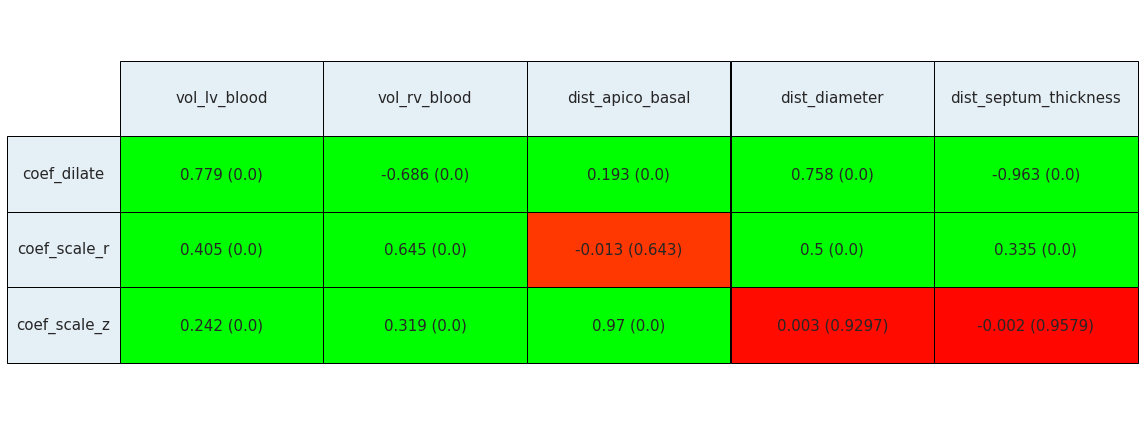

In [6]:
g.plot_sa()

# Testing error


### NoScaler results

In [7]:
g = Manager(pa, fe, Manager.NOSCALER)
plot_data = g.plot_ml_test_resutls()

-------------ridge-------------
MSE train: 0.1320 (0.0095)
MSE test: 0.1310 (0.1852)
r2: 0.9925203032255187
recomputed MSE test: 0.1310 (0.2986)
--------------knn--------------
MSE train: 0.0616 (0.0103)
MSE test: 0.0556 (0.0777)
r2: 0.9662201827862319
recomputed MSE test: 0.0556 (0.1716)
--------------nn---------------
MSE train: 0.0271 (0.0111)
MSE test: 0.0410 (0.0336)
r2: 0.12851789048101267
recomputed MSE test: 0.0410 (0.0944)


NoScaler


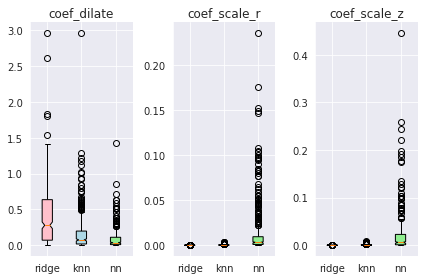

In [8]:
print(Manager.NOSCALER)
boxplot(plot_data, pa.columns)

### MinMaxScaler results

In [9]:
g = Manager(pa, fe, Manager.MINMAXSCALER)
plot_data = g.plot_ml_test_resutls()

-------------ridge-------------
MSE train: 0.1299 (0.0140)
MSE test: 0.1357 (0.1918)
r2: 0.9919996499631245
recomputed MSE test: 0.1357 (0.2990)
--------------knn--------------
MSE train: 0.0651 (0.0097)
MSE test: 0.0675 (0.0952)
r2: 0.9871512283769647
recomputed MSE test: 0.0675 (0.2424)
--------------nn---------------
MSE train: 0.0094 (0.0033)
MSE test: 0.0053 (0.0074)
r2: 0.9936444115703661
recomputed MSE test: 0.0053 (0.0184)


MinMaxScaler


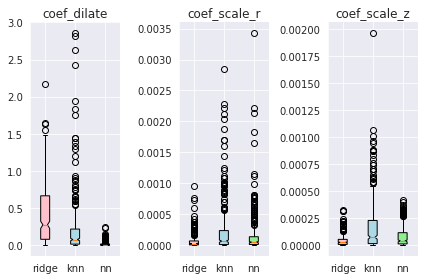

In [10]:
print(Manager.MINMAXSCALER)
boxplot(plot_data, pa.columns)

### StandardScaler results

In [11]:
g = Manager(pa, fe, Manager.STANDARDSCALER)
plot_data = g.plot_ml_test_resutls()

-------------ridge-------------
MSE train: 0.1296 (0.0092)
MSE test: 0.1357 (0.1918)
r2: 0.9919994967106044
recomputed MSE test: 0.1357 (0.2989)
--------------knn--------------
MSE train: 0.0615 (0.0103)
MSE test: 0.0619 (0.0873)
r2: 0.9876002241511573
recomputed MSE test: 0.0619 (0.2322)
--------------nn---------------
MSE train: 0.0100 (0.0028)
MSE test: 0.0107 (0.0110)
r2: 0.8361215450595019
recomputed MSE test: 0.0107 (0.0312)


StandardScaler


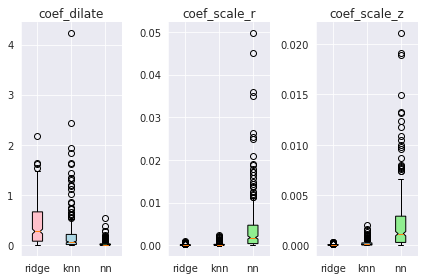

In [12]:
print(Manager.STANDARDSCALER)
boxplot(plot_data, pa.columns)

# Real model prediction error

In [13]:
ddata = []
for scaler in Manager.SCALERS.keys():
	# print(f"{scaler:-^30}")
	g = Manager(pa, fe, scaler)
	results = g.load_result()
	for k,v in results.items():
		# print(f"--> {k}\n{v}")
		for ii in v.columns:
			ddata.append({'scaler':scaler, 'method':k, 'df':v})

In [14]:
df_ = None
print(Manager.NOSCALER)
for x in tf.munchify(tf.query(ddata, scaler=Manager.NOSCALER)):
	if df_ is None:
		df_ = pd.DataFrame(x.df['target'])
	df_[x.method] = x.df['pred']
df_

NoScaler


,target,ridge,knn,nn
vol_lv_blood,120,91.437504,116.328590,130.547912
vol_rv_blood,85,75.300362,82.531430,91.877440
dist_apico_basal,90,87.251572,91.165146,95.623352
dist_diameter,50,50.385474,53.774007,55.412187
dist_septum_thickness,13,14.603726,13.571053,13.896973


In [15]:
df_ = None
print(Manager.MINMAXSCALER)
for x in tf.munchify(tf.query(ddata, scaler=Manager.MINMAXSCALER)):
	if df_ is None:
		df_ = pd.DataFrame(x.df['target'])
	df_[x.method] = x.df['pred']
df_

MinMaxScaler


,target,ridge,knn,nn
vol_lv_blood,120,92.023339,112.288077,112.232437
vol_rv_blood,85,73.074657,78.020273,79.044079
dist_apico_basal,90,87.261108,92.633118,90.426315
dist_diameter,50,50.367126,52.090641,53.085412
dist_septum_thickness,13,14.600297,12.860225,13.352360


In [16]:
df_ = None
print(Manager.STANDARDSCALER)
for x in tf.munchify(tf.query(ddata, scaler=Manager.STANDARDSCALER)):
	if df_ is None:
		df_ = pd.DataFrame(x.df['target'])
	df_[x.method] = x.df['pred']
df_

StandardScaler


,target,ridge,knn,nn
vol_lv_blood,120,91.317901,111.554745,111.242567
vol_rv_blood,85,74.453963,83.543917,76.629384
dist_apico_basal,90,87.256088,89.983688,92.449722
dist_diameter,50,50.365819,53.626823,52.029646
dist_septum_thickness,13,14.601834,14.207230,12.979981
